___
**Training a convolutional neural network on the classic MNIST dataset**
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPool2D
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import metrics

# Loading and visualising the MNIST data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

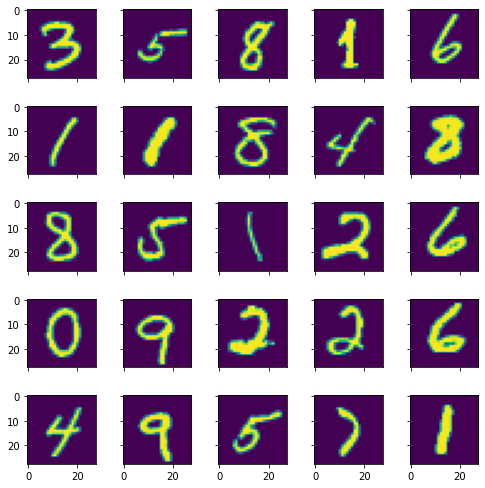

In [3]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(7,7))
plt.tight_layout()
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[np.random.randint(0, len(x_train))])
plt.show()

## Converting the labels into categorical

In [4]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

## Scaling the data

In [5]:
x_train = x_train/255
x_test = x_test/255

# Training the model

In [6]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000,28,28,1)

In [7]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(4, 4),
                 input_shape=(28, 28, 1),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [8]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
with tf.device("/device:GPU:0"):
    model.fit(x_train,
              y_cat_train,
              epochs=15,
              validation_data=(x_test, y_cat_test),
              callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1487 - accuracy: 0.9556 - val_loss: 0.0655 - val_accuracy: 0.9775
Epoch 2/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0481 - val_accuracy: 0.9848
Epoch 3/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0420 - val_accuracy: 0.9854
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0421 - val_accuracy: 0.9863
Epoch 5/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0422 - val_accuracy: 0.9865


In [9]:
model_perf = pd.DataFrame(model.history.history)
model_perf

,loss,accuracy,val_loss,val_accuracy
0,0.148719,0.955567,0.065502,0.9775
1,0.049525,0.984833,0.048054,0.9848
2,0.032784,0.989817,0.041974,0.9854
3,0.022944,0.992933,0.042117,0.9863
4,0.015804,0.994950,0.042233,0.9865


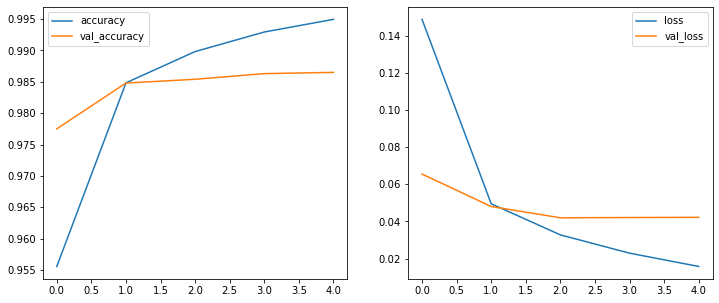

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

model_perf[['accuracy','val_accuracy']].plot(ax=axes[0])
model_perf[['loss','val_loss']].plot(ax=axes[1])

## Model evaluation

In [11]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [12]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



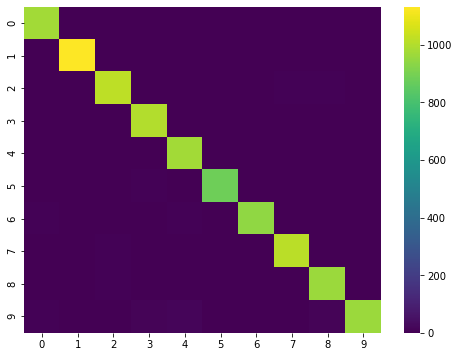

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(y_test,predictions), cmap='viridis')

## Predict a random digit

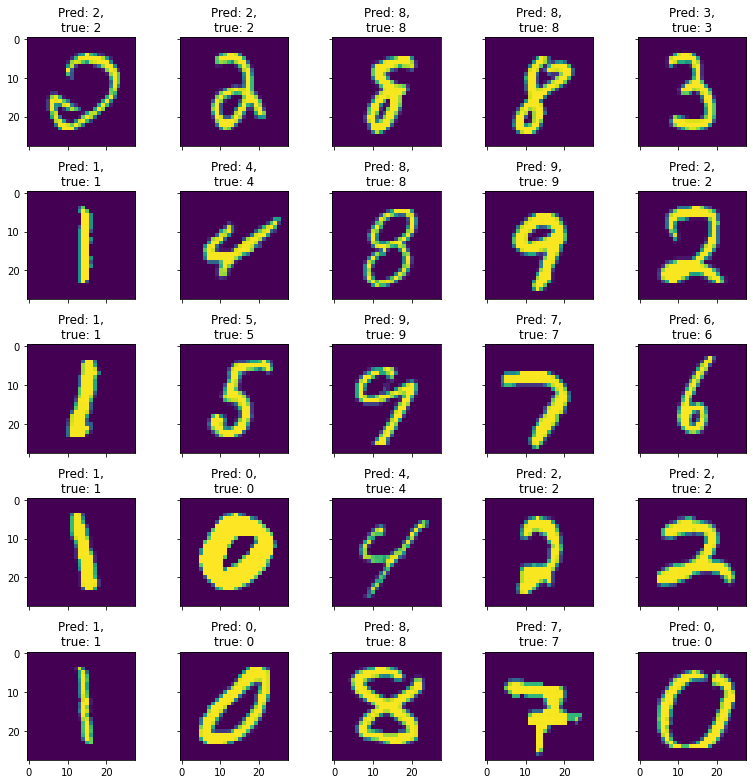

In [14]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(11,11))

for i, ax in enumerate(axes.flatten()):
    i = np.random.randint(0, len(x_test))
    pred_num = np.argmax(model.predict(x_test[i].reshape(1, 28, 28, 1)), axis=-1)
#     pred_num = model.predict_classes()
    ax.imshow(x_test[i].reshape(28, 28))
    ax.set_title(f'Pred: {pred_num[0]},\ntrue: {y_test[i]}')
plt.tight_layout()   
plt.show()

___
**Training a convolutional neural network on the classic CIFAR10 dataset**
___

# Loading and visualising the CIFAR data

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [16]:
d = {0:'airplane',
1:'automobile',
2:'bird',
3:'cat',
4:'deer',
5:'dog',
6:'frog',
7:'horse',
8:'ship',
9:'truck'}

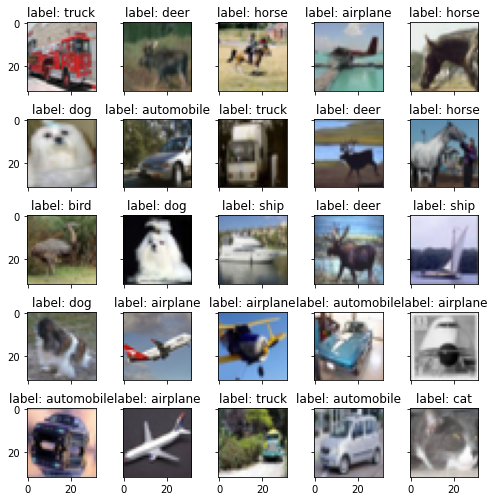

In [17]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(7,7))
plt.tight_layout()
for i, ax in enumerate(axes.flatten()):
    j = np.random.randint(0, len(x_train))
    ax.imshow(x_train[j])
    ax.set_title(f'label: {d[y_train[j][0]]}')
    
plt.show()

In [18]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)
x_train = x_train/255
x_test = x_test/255

In [19]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(4, 4),
                 input_shape=(32, 32, 3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32,
                 kernel_size=(4, 4),
                 input_shape=(32, 32, 3),
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [20]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
with tf.device("/device:GPU:0"):
    model.fit(x_train,
              y_cat_train,
              epochs=15,
              validation_data=(x_test, y_cat_test),
              callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5244 - accuracy: 0.4489 - val_loss: 1.2895 - val_accuracy: 0.5382
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.2014 - accuracy: 0.5749 - val_loss: 1.1597 - val_accuracy: 0.5878
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0471 - accuracy: 0.6338 - val_loss: 1.0733 - val_accuracy: 0.6287
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9454 - accuracy: 0.6716 - val_loss: 0.9863 - val_accuracy: 0.6598
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8583 - accuracy: 0.7013 - val_loss: 1.0308 - val_accuracy: 0.6422
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7828 - accuracy: 0.7264 - val_loss: 1.0156 - val_accuracy: 0.6599


In [21]:
model_perf = pd.DataFrame(model.history.history)
model_perf

,loss,accuracy,val_loss,val_accuracy
0,1.524366,0.44894,1.289504,0.5382
1,1.201353,0.57486,1.159654,0.5878
2,1.047116,0.63380,1.073261,0.6287
3,0.945355,0.67158,0.986314,0.6598
4,0.858341,0.70130,1.030802,0.6422
5,0.782833,0.72640,1.015627,0.6599


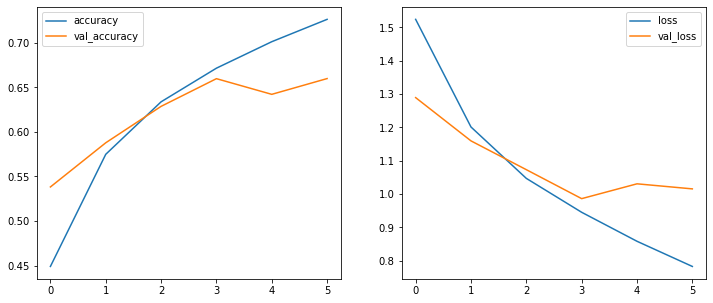

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

model_perf[['accuracy','val_accuracy']].plot(ax=axes[0])
model_perf[['loss','val_loss']].plot(ax=axes[1])

In [23]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [24]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1000
           1       0.75      0.83      0.79      1000
           2       0.48      0.62      0.54      1000
           3       0.54      0.34      0.42      1000
           4       0.65      0.58      0.62      1000
           5       0.66      0.46      0.54      1000
           6       0.60      0.83      0.70      1000
           7       0.73      0.71      0.72      1000
           8       0.73      0.81      0.76      1000
           9       0.82      0.69      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000



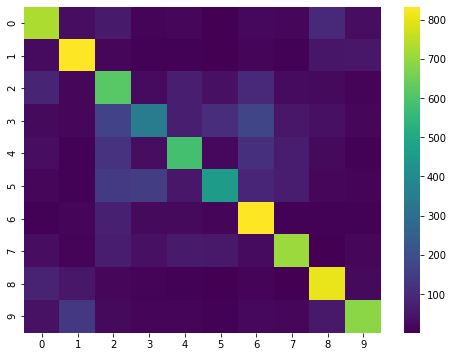

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(y_test,predictions), cmap='viridis')

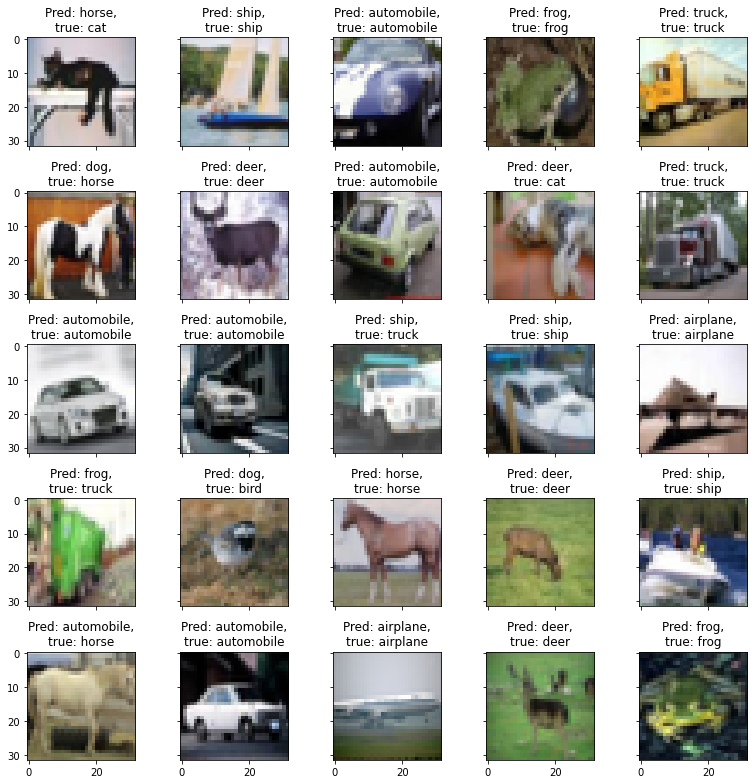

In [27]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(11,11))

for i, ax in enumerate(axes.flatten()):
    i = np.random.randint(0, len(x_test))
    pred_num = model.predict_classes(x_test[i].reshape(1, 32, 32, 3))
    ax.imshow(x_test[i])
    ax.set_title(f'Pred: {d[pred_num[0]]},\ntrue: {d[y_test[i][0]]}')
plt.tight_layout()   
plt.show()